 ## Load the Data & Libraries

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = (12,8)

In [4]:
data = pd.read_csv('bike_sharing_data.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


## Visualize The Data

Text(0.5, 1.0, 'Profit in $10,000 VS City Population in 10,000s')

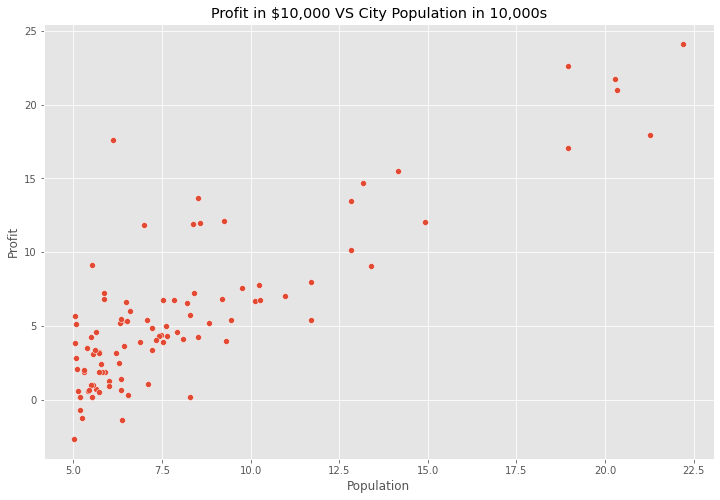

In [13]:
ax = sns.scatterplot(x='Population', y='Profit', data=data)
ax.set_title('Profit in $10,000 VS City Population in 10,000s')

## Compute the cost J(θ)

In [15]:
def costFunction(x,y, theta):
    m=len(y)
    y_pred = x.dot(theta)
    error = (y_pred - y)**2
    
    return (1/(2*m))*np.sum(error)
    

In [19]:
m = data.Population.values.size
x = np.append(np.ones((m,1)), data.Population.values.reshape(m,1), axis=1)
y = data.Profit.values.reshape(m,1)
theta = np.zeros((2,1))

costFunction(x,y,theta)

32.072733877455676

## Gradient Descent

Minimize the cost function J(θ) by updating the below equations & repeat until convergence.

In [30]:
def gradientDescent(x,y,theta, alpha, iterations):
    m = len(y)
    costs =[]
    for i in range(iterations):
        y_pred = x.dot(theta)
        error = np.dot(x.transpose(),(y_pred -y))
        theta -= alpha * 1/m * error
        costs.append(costFunction(x,y,theta))
    
    return theta, costs
    

In [31]:
theta, costs = gradientDescent(x,y,theta,alpha=0.01,iterations=2000)

print("h(x) = {} + {}x1".format(str(round(theta[0,0],2)),str(round(theta[1,0],2))))

h(x) = -3.79 + 1.18x1


## Visualising the Cost Function J(θ)

In [33]:
from mpl_toolkits.mplot3d import Axes3D


In [39]:
theta0 = np.linspace(-10,10,100)
theta1 = np.linspace(-1,4,100)

costValues = np.zeros((len(theta0),len(theta1)))

for i in range(len(theta0)):
    for j in range(len(theta1)):
        t = np.array([theta0[i],theta1[j]])
        costValues[i,j]=costFunction(x,y,t)

C:\Users\annsk\AppData\Local\Temp/ipykernel_11108/988074801.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax =  fig.gca(projection= '3d')


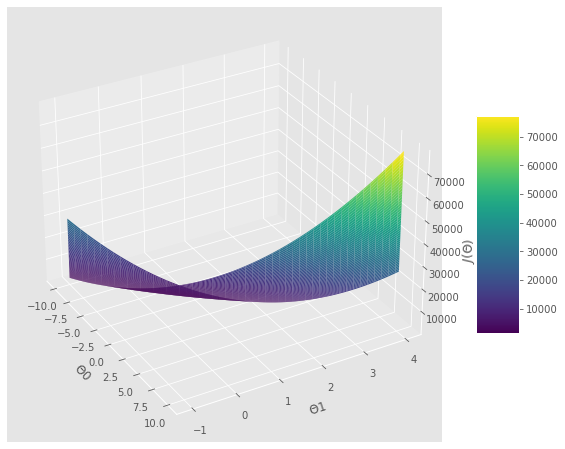

In [43]:
fig = plt.figure(figsize = (12,8))
ax =  fig.gca(projection= '3d')
surf = ax.plot_surface(theta0,theta1,costValues,cmap='viridis')
fig.colorbar(surf,shrink=0.5,aspect=5)

plt.xlabel("$\Theta0$")
plt.ylabel("$\Theta1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30,330)

plt.show()

## Plotting the Convergence

Plot J(θ) against the number of iterations of gradient descent:

Text(0.5, 1.0, 'Values of the Cost Function over Iterations of Gradient desent')

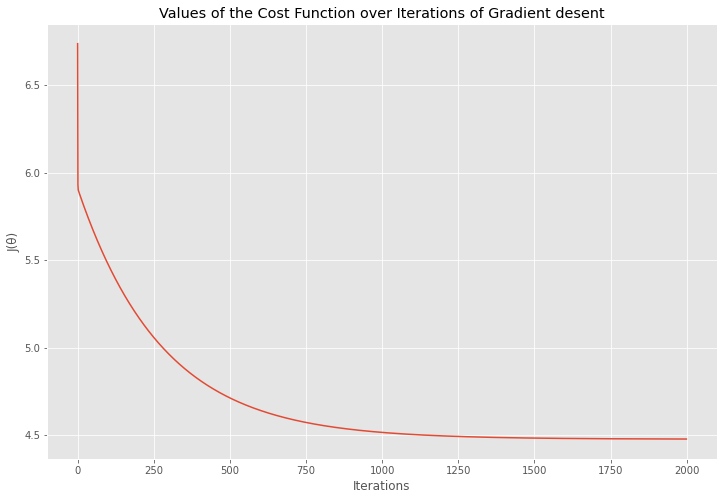

In [45]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("J(θ)")
plt.title("Values of the Cost Function over Iterations of Gradient desent")

## Training Data with Linear Regression Fit

In [48]:
theta.shape

(2, 1)

In [49]:
theta

array([[-3.78806857],
       [ 1.18221277]])

C:\Users\annsk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Linear Regression Fit')

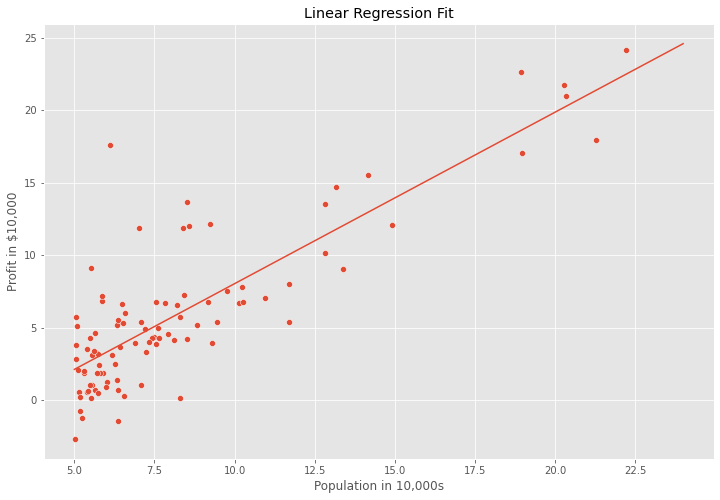

In [53]:
theta = np.squeeze(theta)
sns.scatterplot(x='Population', y='Profit', data=data)

x_value = [x for x in range(5,25)]
y_value = [(x*theta[1]+theta[0]) for x in x_value]
sns.lineplot(x_value, y_value)

plt.xlabel("Population in 10,000s")
plt.ylabel("Profit in $10,000")
plt.title("Linear Regression Fit")

## Inference using the optimized $\Theta$ values

In [56]:
def predict(x,theta):
    y_pred = np.dot(theta.transpose(),x)
    return y_pred

In [58]:
y_pred1 = predict(np.array([1,4]),theta) * 10000
print("For a Population of 40,000 people, the model predicts a profit of $"+str(round(y_pred1,0)))

For a Population of 40,000 people, the model predicts a profit of $9408.0


In [59]:
y_pred2 = predict(np.array([1,8.3]),theta) * 10000
print("For a Population of 83,000 people, the model predicts a profit of $"+str(round(y_pred2,0)))

For a Population of 83,000 people, the model predicts a profit of $60243.0
